# Computational Python

### Author : Awnon Bhowmik

This notebook is to demonstrate the power of the interpreted language Python. It contains various libraries in the form of 'modules'. Some of the modules covered in this talk are

- NumPy - Numerical Python
- SciPy - Scientific Python
- SymPy - Symbolic Python

I've gathered a few straightforward mathematical illustrations and the corresponding theory in this lecture to illustrate the level of computational expertise Python has acquired.

# Sophie Germain Primes

If $p$ and $2p+1$ are both primes, then $p$ is called a Sophie Germain prime. The following program demonstrates how to find a few of them.

$p = 2$

$2p + 1 = 2*2 + 1 = 5$, which is also prime.

In [11]:
from sympy.ntheory import isprime, nextprime

p = 2
i = 1
count = 10

lst=[]

while True:
    if i > count:
        break

    if(isprime(2*p + 1)):
        lst.append(p)
        i+=1
    
    p = nextprime(p)

first_primes = []
p = 2 

for _ in range(10):
    first_primes.append(p)
    p = nextprime(p)

print(f"The first 10 prime numbers are: {first_primes}")
print(f"The first 10 Sophie Germain Primes are : {lst}")

The first 10 prime numbers are: [2, 3, 5, 7, 11, 13, 17, 19, 23, 29]
The first 10 Sophie Germain Primes are : [2, 3, 5, 11, 23, 29, 41, 53, 83, 89]


# Optimization

Let's try and optimize a few single variable functions.

\begin{align}f(x)&=x^2+2x+4\\g(x)&=-x^2+6x+15\end{align}

In [22]:
from scipy.optimize import minimize

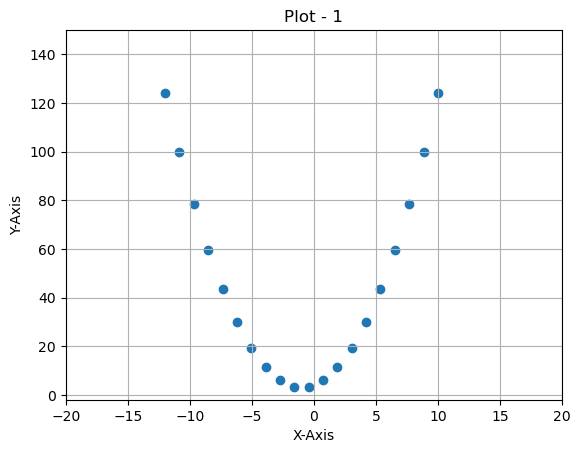

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def function_1(x: float) -> float:
    return x**2 + 2*x + 4

x_values = np.linspace(start=-12, stop=10, num=20)
y_values = np.array([function_1(x) for x in x_values])

plt.scatter(x=x_values, y=y_values)
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")
plt.title("Plot - 1")
plt.grid(visible=True)
plt.xlim((-20, 20))
plt.ylim((-2, 150))
plt.show()

In [31]:
val1 = minimize(function_1, x0=0)

print(type(val1))
print()
print(val1)
print()
print(f"The minimum value of the given function is: {round(val1.x[0])}")

<class 'scipy.optimize._optimize.OptimizeResult'>

      fun: 3.0
 hess_inv: array([[0.5]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([-1.00000001])

The minimum value of the given function is: -1


In [9]:
def g(x):
    return -x**2+6*x+15

val2 = minimize(g,x0=0)
print(val2.x[0])

-1034.24


See that we cannot minimize this function, and I could not find a method to maximize this function.

But we still have the old school method.

In [10]:
from scipy.misc import derivative
from sympy import symbols, solve

First we will try it for $f(x)$ followed by $g(x)$

In [11]:
x = symbols('x')

Df = derivative(f, x, dx=1e-6)
solve(Df)

type(Df)

sympy.core.add.Add

In [7]:
Dg = derivative(g, x, dx=1e-6)
solve(Dg)

[3.00000000000000]

In [8]:
print("Min(f(x)) = {}\nMax(g(x)) = {}".format(f(-1),g(3)))

Min(f(x)) = 3
Max(g(x)) = 24


Using the same idea, we can compute and plot successive derivatives of an arbitrary function, all on the same set of axes.

NumPy -> Numerical Python

SciPy -> Scientific Python

SymPy -> Symbolic Python

Matplotlib -> Plotting

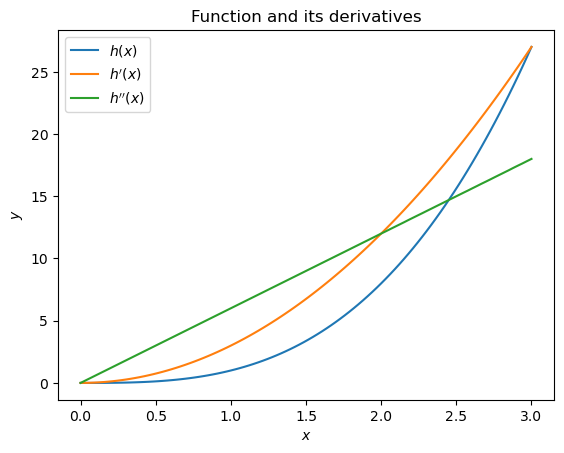

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def h(x):
    return x**3

x = np.linspace(0,3,100)

plt.plot(x, h(x))
plt.plot(x, derivative(h, x, dx=1e-6))
plt.plot(x, derivative(h, x, dx=1e-06, n=2))
plt.legend(["$h(x)$","$h'(x)$","$h''(x)$"],loc='best')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title("Function and its derivatives")
plt.show()

# Interpolation

Suppose we have an arbitrary scatter plot consisting $n$ points in a domain $a\le x\le b$. Interpolation is the process of looking at the curve approximation $f(x)$ of the scatter plot, and evaluating the function at some point $x_0\in[a,b]$.

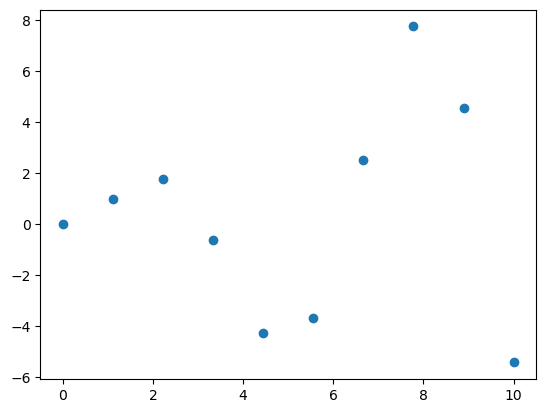

In [55]:
x = np.linspace(0,10,10)
y = x*np.sin(x)
plt.scatter(x,y)
plt.show()

In [11]:
from scipy.interpolate import interp1d

In [12]:
f = interp1d(x, y, kind='cubic')
x_dense = np.linspace(0, 10, 100)
y_dense = f(x_dense)

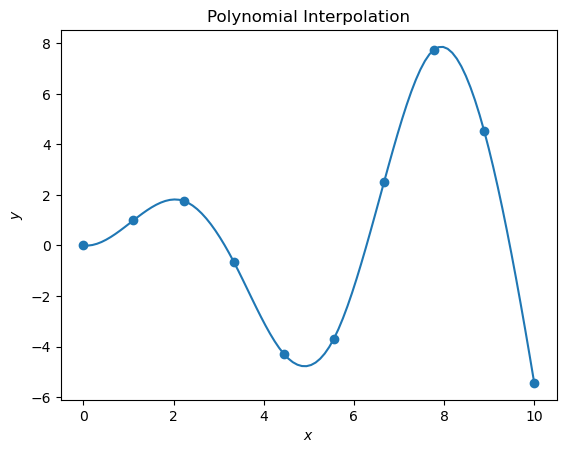

In [56]:
plt.plot(x_dense,y_dense)
plt.scatter(x,y)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Polynomial Interpolation')
plt.show()

# Graphical Proof of different searching & sorting algorithms and their complexities

This is an extract from one of my final year undergraduate projects. It involves

- Linear Search
- Binary Search
------------------------
- Bubble Sort
- Insertion Sort
- Merge Sort

In [52]:
data_size= np.array([2**x for x in range(1,23)], dtype=np.int64)
# print(data_size)
time = np.array([0.0259,0.0322,0.0382,0.0439,0.0524,0.0609,0.0726,0.0967,0.1258,0.1807,0.282,0.5639,1.0141,1.8205,4.4571,9.5779,17.1452,33.4916,63.2732,132.486,264.879,533.471], dtype=np.float64)
print(len(time))

22


In [53]:
from scipy.optimize import curve_fit

One thing you might notice is that the $\textbf{\blue{polyfit()}}$ function from the NumPy library can be used to plot best fit lines.

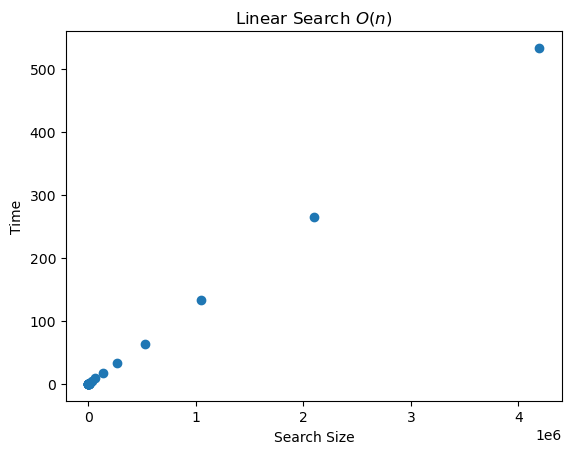

In [54]:
plt.scatter(data_size,time)
plt.title('Linear Search $O(n)$')
plt.xlabel('Search Size')
plt.ylabel('Time')
plt.show()

In [49]:
time = np.array([0.0063, 0.016, 0.0242, 0.0337, 0.0417, 0.0499, 0.0574, 0.063, 0.0708, 0.0764, 0.0863, 0.0916, 0.1264, 0.132, 0.1395, 0.1709, 0.1765, 0.2117, 0.2186, 0.2244, 0.2303, 0.2358])

Text(0, 0.5, 'Time')

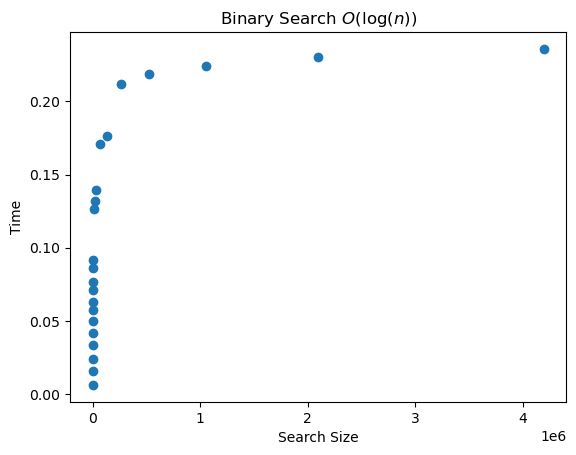

In [50]:
plt.scatter(data_size,time)
plt.title('Binary Search $O(\log(n))$')
plt.xlabel('Search Size')
plt.ylabel('Time')

In [23]:
data_size= np.array([500*x for x in range(1,21)])
print(data_size)

[  500  1000  1500  2000  2500  3000  3500  4000  4500  5000  5500  6000
  6500  7000  7500  8000  8500  9000  9500 10000]


In [34]:
time_bubble=np.array([0.008,77.294,251.831,554.025,1042.15,1661,2457,3445.9,4686.53,6212.53,7977.05,9995.66,12460.8,15075,18180.7,21653.8,25586.2,29907.5,34487.4,40197.6], dtype=np.float64)

time_insert=np.array([0.0002,21.4154,66.0683,154.837,301.903,516.159,785.043,1175.06,1592.55,2112.84,2748.5,3438.55,4291.67,5250.65,6407.42,7671.78,9126.32,10839.5,12568.8,14580.3], dtype=np.float64)

time_merge=np.array([0.0003,10.5329,24.2853,44.2544,67.6642,93.2231,124.058,167.547,204.841,244.192,286.268,331.047,383.471,435.02,494.877,554.119,632.068,699.509,781.592,856.207], dtype=np.float64)

print(len(time_bubble))
print(len(time_insert))
print(len(time_merge))

20
20
20


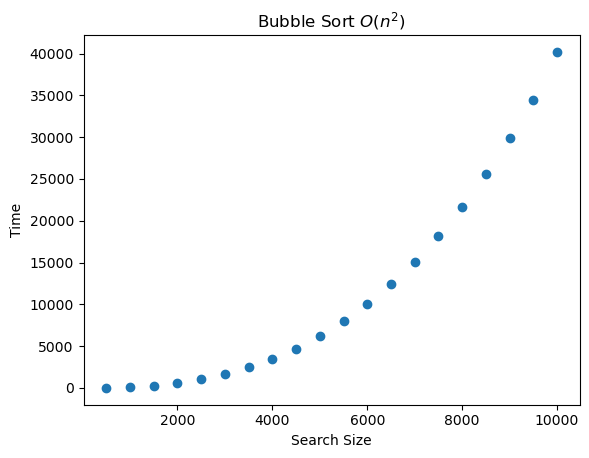

In [42]:
plt.scatter(data_size,time_bubble)
plt.title('Bubble Sort $O(n^2)$')
plt.xlabel('Search Size')
plt.ylabel('Time')
plt.show()

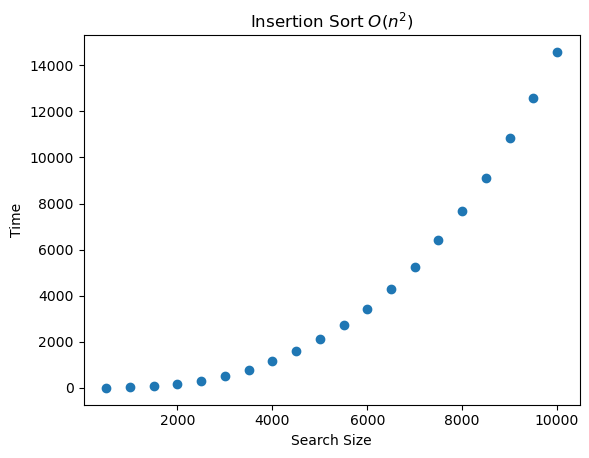

In [41]:
plt.scatter(data_size,time_insert)
plt.title('Insertion Sort $O(n^2)$')
plt.xlabel('Search Size')
plt.ylabel('Time')
plt.show()

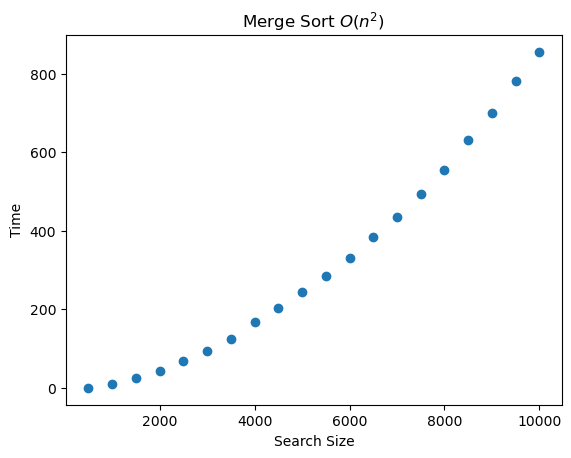

In [40]:
plt.scatter(data_size,time_merge)
plt.title('Merge Sort $O(n^2)$')
plt.xlabel('Search Size')
plt.ylabel('Time')
plt.show()

In [32]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!
